In [43]:
import pandas_gbq
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
import pickle
import h5py
warnings.filterwarnings("ignore")

In [44]:
with open('../../../app/SQL/Query_traer_clientes_simplificado.sql') as file:
    query=file.read()
data=pandas_gbq.read_gbq(query, project_id='customer-experience-384423',progress_bar_type=None)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130964 entries, 0 to 130963
Data columns (total 83 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id_cliente                         130964 non-null  Int64  
 1   promedio_compra                    130964 non-null  float64
 2   cantidad_compras                   130964 non-null  Int64  
 3   dropsize                           130964 non-null  float64
 4   contactable                        130964 non-null  Int64  
 5   compro_en_OUTLET                   130964 non-null  Int64  
 6   compro_en_ESTELAR                  130964 non-null  Int64  
 7   compro_en_MOVIES                   130964 non-null  Int64  
 8   compro_en_LITTLE_MIC               130964 non-null  Int64  
 9   compro_en_MOVIES_W                 130964 non-null  Int64  
 10  compro_en_OUTLET_MIC               130964 non-null  Int64  
 11  compro_en_EVENTOS                  1309

In [46]:
data.describe()

,id_cliente,promedio_compra,cantidad_compras,dropsize,contactable,compro_en_OUTLET,compro_en_ESTELAR,compro_en_MOVIES,compro_en_LITTLE_MIC,compro_en_MOVIES_W,...,compro_en_ECUADOR,compras_2018,compras_2019,compras_2020,compras_2021,recencia_1_3_meses,recencia_3_6_meses,recencia_6_9_meses,recencia_9_12_meses,recencia_1_o_mas_anos
count,130964.0,1.309640e+05,130964.0,130964.000000,130964.0,130964.0,130964.0,130964.0,130964.0,130964.0,...,130964.0,7.180000e+03,1.456000e+04,3.226000e+04,7.632500e+04,130964.0,130964.0,130964.0,130964.0,130964.0
mean,125687.280405,8.319622e+04,10.366681,12986.659524,0.76967,0.0,0.0,0.0,0.799663,0.0,...,0.0,6.411525e+05,6.654882e+05,9.453978e+05,1.033879e+06,0.150644,0.203438,0.147277,0.065484,0.433157
std,71994.712255,6.467721e+04,14.789708,8521.135749,0.421046,0.0,0.0,0.0,0.400254,0.0,...,0.0,1.630708e+06,1.851324e+06,2.408465e+06,3.426686e+06,0.357703,0.402557,0.354383,0.247378,0.495514
min,7.0,-3.576501e+05,2.0,-175252.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-7.575600e+05,-6.480640e+05,-1.470538e+06,-1.502130e+07,0.0,0.0,0.0,0.0,0.0
25%,63662.5,4.293500e+04,4.0,6890.666667,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,8.386600e+04,9.400000e+04,1.172410e+05,1.198000e+05,0.0,0.0,0.0,0.0,0.0
50%,126931.5,6.713400e+04,6.0,11731.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.205960e+05,2.349560e+05,3.359490e+05,3.461520e+05,0.0,0.0,0.0,0.0,0.0
75%,189802.25,1.041168e+05,12.0,17416.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.783160e+05,6.285915e+05,9.529410e+05,9.767600e+05,0.0,0.0,0.0,0.0,1.0
max,250139.0,2.212655e+06,686.0,245661.500000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.645668e+07,1.213729e+08,1.269281e+08,3.656482e+08,1.0,1.0,1.0,1.0,1.0


In [47]:
data.drop(columns=['contactable'],inplace=True)

In [48]:
len(data)

130964

In [49]:
len(data[data['promedio_compra']<0])

311

In [50]:
len(data[data['promedio_compra']<0])*100/len(data)

0.23746983903973612

In [51]:
len(data[data['promedio_compra']>1000000])

18

In [52]:
len(data[data['promedio_compra']>1000000])*100/len(data)

0.013744235056962218

<Axes: >

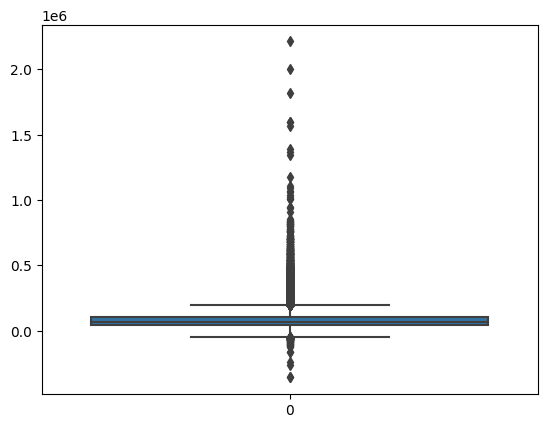

In [53]:
sns.boxplot(data['promedio_compra'])

<Axes: >

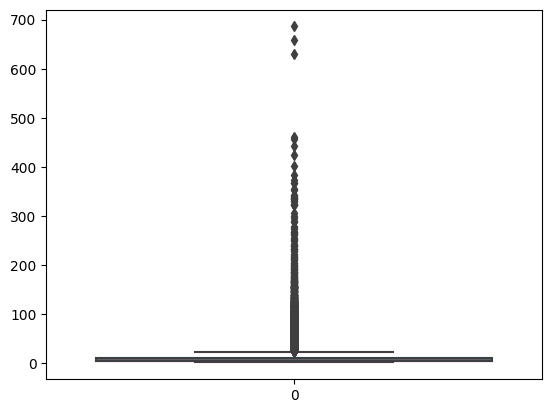

In [54]:
sns.boxplot(data['cantidad_compras'])

In [55]:
data_sin_outliers=data[(data['promedio_compra']<1000000) & (data['promedio_compra']>0)&(data['cantidad_compras']<500)]

<Axes: >

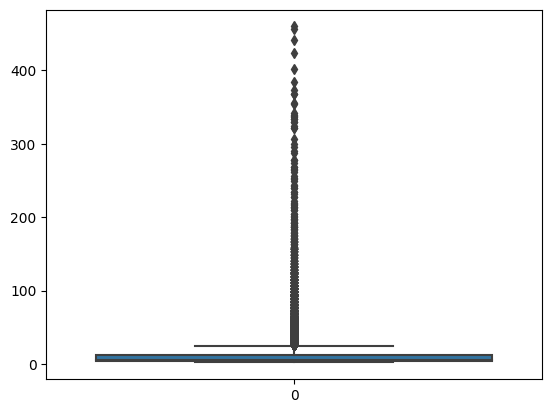

In [56]:
sns.boxplot(data_sin_outliers['cantidad_compras'])

<Axes: >

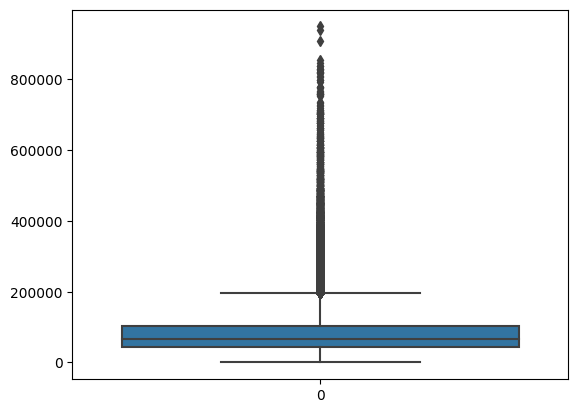

In [57]:
sns.boxplot(data_sin_outliers['promedio_compra'])

In [58]:
id_cliente=data_sin_outliers['id_cliente']
data_sin_outliers.drop(columns=['id_cliente'],inplace=True)

In [59]:
data_sin_outliers.fillna(0,inplace=True)

In [60]:
data_sin_outliers.describe()

,promedio_compra,cantidad_compras,dropsize,compro_en_OUTLET,compro_en_ESTELAR,compro_en_MOVIES,compro_en_LITTLE_MIC,compro_en_MOVIES_W,compro_en_OUTLET_MIC,compro_en_EVENTOS,...,compro_en_ECUADOR,compras_2018,compras_2019,compras_2020,compras_2021,recencia_1_3_meses,recencia_3_6_meses,recencia_6_9_meses,recencia_9_12_meses,recencia_1_o_mas_anos
count,1.305160e+05,130516.0,1.305160e+05,130516.0,130516.0,130516.0,130516.0,130516.0,130516.0,130516.0,...,130516.0,1.305160e+05,1.305160e+05,1.305160e+05,1.305160e+05,130516.0,130516.0,130516.0,130516.0,130516.0
mean,8.335467e+04,10.357489,1.305503e+04,0.0,0.0,0.0,0.799756,0.0,0.0,0.0,...,0.0,3.535661e+04,7.329133e+04,2.321033e+05,5.921572e+05,0.150817,0.203822,0.147331,0.065356,0.432675
std,6.254161e+04,14.442891,8.401920e+03,0.0,0.0,0.0,0.400184,0.0,0.0,0.0,...,0.0,4.094013e+05,5.597593e+05,1.192434e+06,2.106702e+06,0.357872,0.40284,0.354437,0.247154,0.495448
min,9.094947e-13,2.0,5.684342e-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-5.001680e+05,-2.790220e+05,-3.504160e+05,-1.518190e+06,0.0,0.0,0.0,0.0,0.0
25%,4.326838e+04,4.0,6.915598e+03,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
50%,6.714300e+04,6.0,1.173550e+04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,7.406000e+04,0.0,0.0,0.0,0.0,0.0
75%,1.042616e+05,12.0,1.741600e+04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.549830e+05,0.0,0.0,0.0,0.0,1.0
max,9.492812e+05,460.0,2.456615e+05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,3.645668e+07,5.113336e+07,9.525155e+07,1.588375e+08,1.0,1.0,1.0,1.0,1.0


In [61]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_sin_outliers)
data_scaled = pd.DataFrame(data_scaled, columns=data_sin_outliers.columns)

In [62]:
data_scaled.describe()

,promedio_compra,cantidad_compras,dropsize,compro_en_OUTLET,compro_en_ESTELAR,compro_en_MOVIES,compro_en_LITTLE_MIC,compro_en_MOVIES_W,compro_en_OUTLET_MIC,compro_en_EVENTOS,...,compro_en_ECUADOR,compras_2018,compras_2019,compras_2020,compras_2021,recencia_1_3_meses,recencia_3_6_meses,recencia_6_9_meses,recencia_9_12_meses,recencia_1_o_mas_anos
count,130516.000000,130516.000000,130516.000000,130516.0,130516.0,130516.0,130516.000000,130516.0,130516.0,130516.0,...,130516.0,130516.000000,130516.000000,130516.000000,130516.000000,130516.000000,130516.000000,130516.000000,130516.000000,130516.000000
mean,0.087808,0.018248,0.053142,0.0,0.0,0.0,0.799756,0.0,0.0,0.0,...,0.0,0.014491,0.006853,0.006093,0.013160,0.150817,0.203822,0.147331,0.065356,0.432675
std,0.065883,0.031535,0.034201,0.0,0.0,0.0,0.400184,0.0,0.0,0.0,...,0.0,0.011078,0.010888,0.012473,0.013138,0.357872,0.402840,0.354437,0.247154,0.495448
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.045580,0.004367,0.028151,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.013534,0.005427,0.003665,0.009468,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.070730,0.008734,0.047771,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.013534,0.005427,0.003665,0.009929,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.109832,0.021834,0.070894,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.013534,0.005427,0.003665,0.012305,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
filas_en_ceros=data_scaled.columns[data_scaled.sum()== 0].to_list()
data_scaled.drop(columns=filas_en_ceros,inplace=True)

In [64]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130516 entries, 0 to 130515
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   promedio_compra                    130516 non-null  float64
 1   cantidad_compras                   130516 non-null  float64
 2   dropsize                           130516 non-null  float64
 3   compro_en_LITTLE_MIC               130516 non-null  float64
 4   compro_en_OUTLET_LITTLE_MIC        130516 non-null  float64
 5   dias_desde_ultima_compra_recencia  130516 non-null  float64
 6   PELUCHES                           130516 non-null  float64
 7   CALCETINES                         130516 non-null  float64
 8   PELUCHE                            130516 non-null  float64
 9   GAFAS                              130516 non-null  float64
 10  JUGUETERIA                         130516 non-null  float64
 11  SUECOS                             1305

<Axes: >

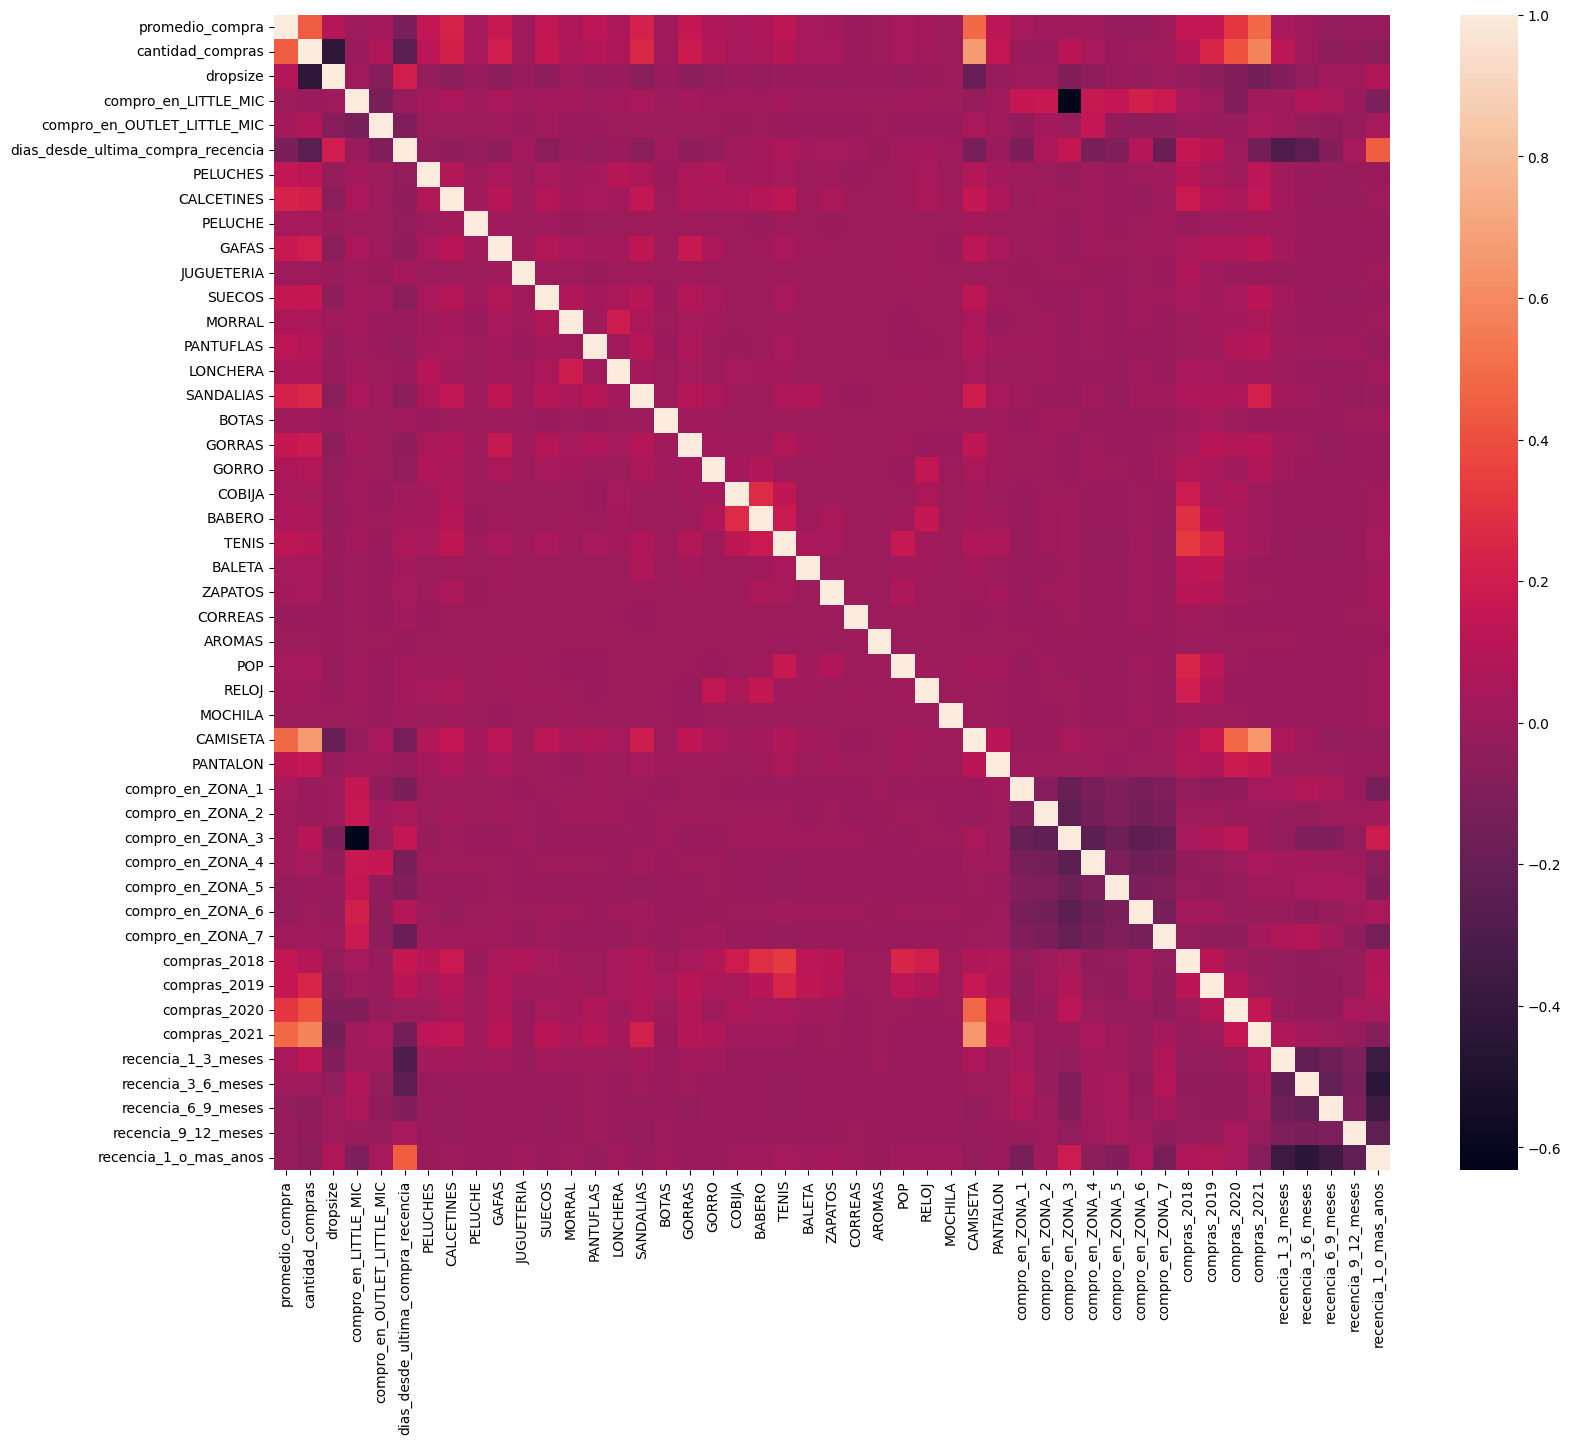

In [65]:
plt.figure(figsize=(18,15))
sns.heatmap(data=data_scaled.corr(), annot=False)

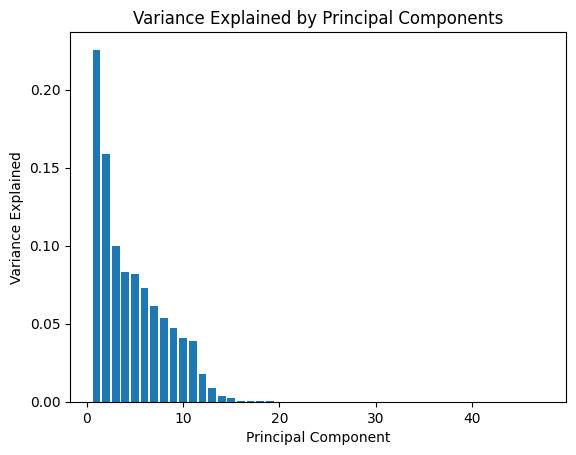

Explained Variance:
promedio_compra: 0.2256
cantidad_compras: 0.1585
dropsize: 0.0999
compro_en_LITTLE_MIC: 0.0834
compro_en_OUTLET_LITTLE_MIC: 0.0821
dias_desde_ultima_compra_recencia: 0.0732
PELUCHES: 0.0614
CALCETINES: 0.0538
PELUCHE: 0.0470
GAFAS: 0.0410
JUGUETERIA: 0.0388
SUECOS: 0.0179
MORRAL: 0.0086
PANTUFLAS: 0.0038
LONCHERA: 0.0025
SANDALIAS: 0.0007
BOTAS: 0.0003
GORRAS: 0.0002
GORRO: 0.0002
COBIJA: 0.0001
BABERO: 0.0001
TENIS: 0.0001
BALETA: 0.0001
ZAPATOS: 0.0001
CORREAS: 0.0001
AROMAS: 0.0001
POP: 0.0001
RELOJ: 0.0001
MOCHILA: 0.0000
CAMISETA: 0.0000
PANTALON: 0.0000
compro_en_ZONA_1: 0.0000
compro_en_ZONA_2: 0.0000
compro_en_ZONA_3: 0.0000
compro_en_ZONA_4: 0.0000
compro_en_ZONA_5: 0.0000
compro_en_ZONA_6: 0.0000
compro_en_ZONA_7: 0.0000
compras_2018: 0.0000
compras_2019: 0.0000
compras_2020: 0.0000
compras_2021: 0.0000
recencia_1_3_meses: 0.0000
recencia_3_6_meses: 0.0000
recencia_6_9_meses: 0.0000
recencia_9_12_meses: 0.0000
recencia_1_o_mas_anos: 0.0000


In [66]:
columns = data_scaled.columns

pca = PCA()
pca.fit(data_scaled)

# Get the variance explained by each principal component
variance_explained = pca.explained_variance_ratio_

# Plot the variance explained
plt.bar(range(1, len(variance_explained) + 1), variance_explained)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.show()

# Create a dictionary with column names and their explained variance
explained_variance_dict = dict(zip(columns, variance_explained))

print("Explained Variance:")
for column, explained_variance in explained_variance_dict.items():
    print(f"{column}: {explained_variance:.4f}")

In [67]:
pca = PCA(n_components=5)
pca.fit(data_scaled)
data_pca=pca.transform(data_scaled)

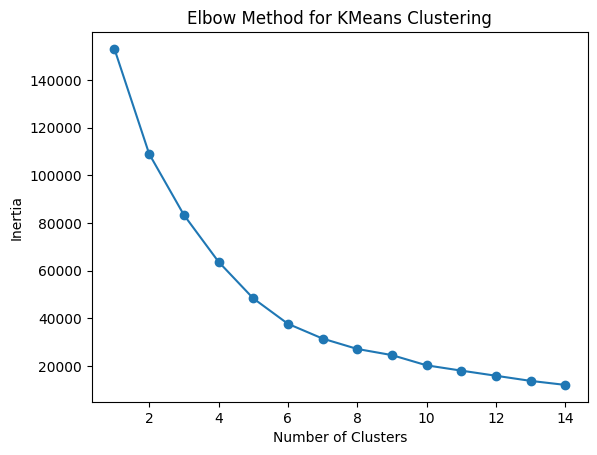

In [68]:
cluster_range = range(1, 15)  
inertias = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_pca)
    inertias.append(kmeans.inertia_)


plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans Clustering')
plt.show()

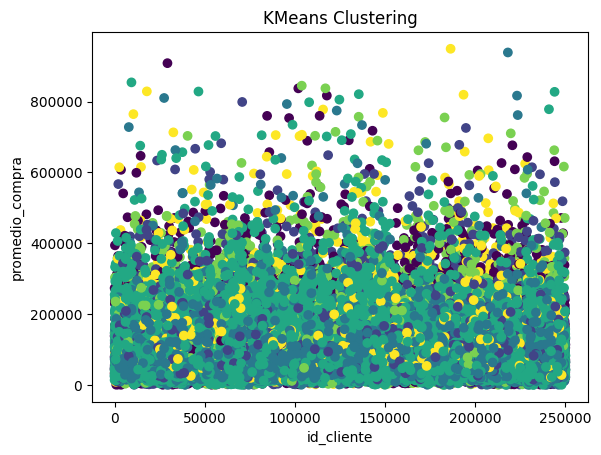

In [69]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_
plt.scatter(id_cliente, data_sin_outliers['promedio_compra'], c=labels) 
plt.xlabel('id_cliente')
plt.ylabel('promedio_compra')
plt.title('KMeans Clustering')
plt.show()

In [70]:
df_clusters = pd.DataFrame(kmeans.cluster_centers_, columns=data_scaled.columns).T

In [71]:
df_clusters

,0,1,2,3,4,5
promedio_compra,8.534314e-02,8.419942e-02,8.340198e-02,8.806042e-02,9.015172e-02,9.701927e-02
cantidad_compras,1.557269e-02,1.354186e-02,2.287356e-02,1.706213e-02,1.819952e-02,2.823329e-02
dropsize,5.627268e-02,5.622850e-02,4.521492e-02,5.558432e-02,5.274983e-02,4.564171e-02
compro_en_LITTLE_MIC,9.788502e-01,9.988523e-01,4.228106e-02,4.846523e-01,9.984652e-01,9.909882e-01
compro_en_OUTLET_LITTLE_MIC,2.879555e-02,5.826786e-03,1.507128e-02,1.709955e-02,9.735134e-03,2.298921e-02
dias_desde_ultima_compra_recencia,3.376916e-01,2.546410e-01,1.760203e-01,4.403035e-01,1.726341e-01,1.210649e-01
PELUCHES,2.110044e-02,2.071868e-02,2.034798e-02,2.069234e-02,2.098699e-02,2.155612e-02
CALCETINES,6.471830e-02,6.396572e-02,6.294910e-02,6.468491e-02,6.450893e-02,6.677844e-02
PELUCHE,2.849382e-04,1.095351e-04,7.128629e-18,8.409427e-05,1.417952e-04,6.691427e-04
GAFAS,4.957792e-02,4.916332e-02,4.809189e-02,4.869694e-02,4.937849e-02,5.109794e-02


In [72]:

with open('../services/scaler-0.1.0.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [73]:
with h5py.File('../models/trained_model-0.1.0.h5', 'w') as file:
    file.create_dataset('cluster_centers_', data=kmeans.cluster_centers_)
    file.create_dataset('labels_', data=kmeans.labels_)
    file.create_dataset('inertia_', data=kmeans.inertia_)
    file.create_dataset('n_iter_', data=kmeans.n_iter_)